<a href="https://colab.research.google.com/github/hayagreev2810/stock-market-eda/blob/main/stockmarket.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('stockmarket.csv')


**CHECKING NULL VALUES**

In [ ]:
# @title
df.isnull().sum()


,0
Date,0
Ticker,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [ ]:


df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,25486.000000,25486.000000,25486.000000,25486.000000,25486.000000,2.548600e+04
mean,122.880757,124.155843,121.584466,122.910798,120.838984,7.770094e+07
std,115.447694,116.647929,114.176053,115.447702,115.470334,1.571748e+08
min,0.481250,0.487500,0.473500,0.478500,0.459453,0.000000e+00
25%,39.992501,40.222501,39.664376,39.950251,38.005300,7.839552e+06
50%,91.272247,92.334751,90.328251,91.234249,90.031422,2.504400e+07
75%,165.699997,167.208370,164.027500,165.617496,164.885014,6.082800e+07
max,956.200012,972.530029,949.950012,954.479980,954.479980,3.692928e+09


**DATE RANGE**


In [ ]:

df['Date'] = pd.to_datetime(df['Date'])
print("Start Date:", df['Date'].min())
print("End Date:", df['Date'].max())


Start Date: 2015-01-02 00:00:00
End Date: 2024-08-29 00:00:00


In [ ]:
df.head()

,Date,Ticker,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,AAPL,27.847500,27.860001,26.837500,27.332500,24.373959,212818400
1,2015-01-05,AAPL,27.072500,27.162500,26.352501,26.562500,23.687313,257142000
2,2015-01-06,AAPL,26.635000,26.857500,26.157499,26.565001,23.689535,263188400
3,2015-01-07,AAPL,26.799999,27.049999,26.674999,26.937500,24.021711,160423600
4,2015-01-08,AAPL,27.307501,28.037500,27.174999,27.972500,24.944679,237458000


**RENAMING COLUMN TICKER TO STOCK NAME FOR SIMPLICITY**


In [ ]:
df.rename(columns={'Ticker': 'Stock Name'}, inplace=True)


**CALCULATING DAILTY RETURN (%)**

In [ ]:
# @title
df['Daily Return'] = df.groupby('Stock Name')['Adj Close'].pct_change()
df.head()

,Date,Stock Name,Open,High,Low,Close,Adj Close,Volume,Daily Return
0,2015-01-02,AAPL,27.847500,27.860001,26.837500,27.332500,24.373959,212818400,NaN
1,2015-01-05,AAPL,27.072500,27.162500,26.352501,26.562500,23.687313,257142000,-0.028171
2,2015-01-06,AAPL,26.635000,26.857500,26.157499,26.565001,23.689535,263188400,0.000094
3,2015-01-07,AAPL,26.799999,27.049999,26.674999,26.937500,24.021711,160423600,0.014022
4,2015-01-08,AAPL,27.307501,28.037500,27.174999,27.972500,24.944679,237458000,0.038422


***MAXIMUM AND MINIMUM CLOSING ***

In [ ]:
min_rows = df.loc[df.groupby('Stock Name')['Adj Close'].idxmin()]
max_rows = df.loc[df.groupby('Stock Name')['Adj Close'].idxmax()]

result = pd.merge(
    min_rows[['Stock Name', 'Date', 'Adj Close']].rename(columns={'Date': 'Min Date', 'Adj Close': 'Min Adj Close'}),
    max_rows[['Stock Name', 'Date', 'Adj Close']].rename(columns={'Date': 'Max Date', 'Adj Close': 'Max Adj Close'}),
    on='Stock Name'
)

print(result)


   Stock Name   Min Date  Min Adj Close   Max Date  Max Adj Close
0     2222.SR 2020-03-16      19.693022 2022-05-16      35.625034
1        AAPL 2016-05-12      20.720034 2024-07-16     234.548523
2        AMZN 2015-01-15      14.347500 2024-07-02     200.000000
3       BRK-B 2016-01-25     124.129997 2024-08-29     468.369995
4        GOOG 2015-01-12      24.532154 2024-07-10     192.660004
5       GOOGL 2015-01-12      24.824511 2024-07-10     191.179993
6         LLY 2015-03-06      57.039875 2024-08-27     954.479980
7        META 2015-01-15      73.898148 2024-07-05     539.909973
8        MSFT 2015-01-30      34.760639 2024-07-05     466.718781
9        NVDA 2015-01-07       0.459453 2024-06-18     135.580002
10        TSM 2015-08-24      14.744743 2024-07-10     191.050003


**CALCULATING AND PLOTTING AVERAGE DAILY RETURN FOR EACH STOCK**

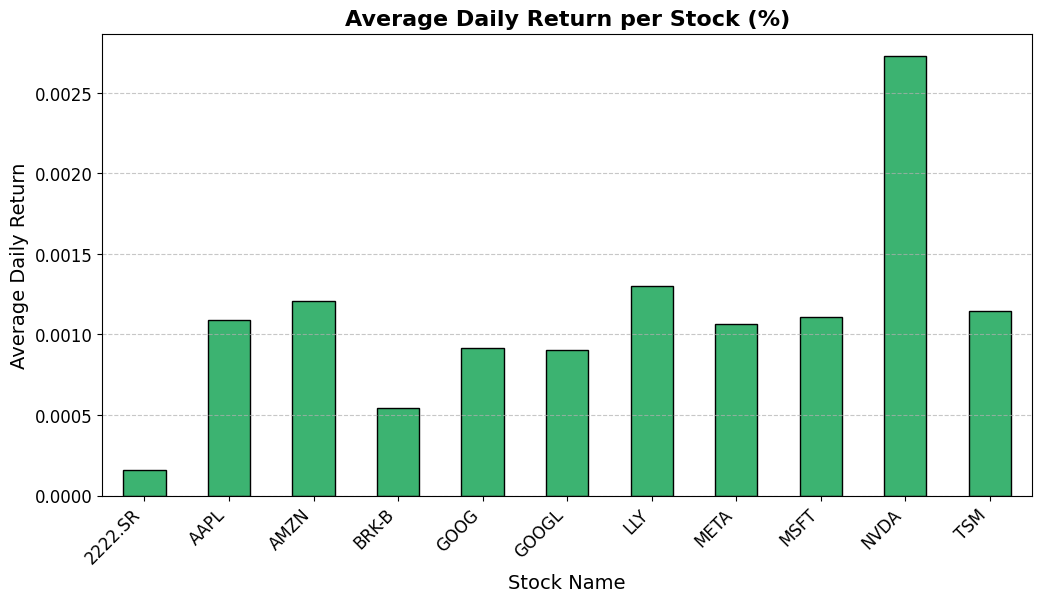

In [ ]:
avg_daily_returns=df.groupby('Stock Name')['Daily Return'].mean()
plt.figure(figsize=(12, 6))

avg_daily_returns.plot(
    kind='bar',
    color='mediumseagreen',
    edgecolor='black'
)


plt.title('Average Daily Return per Stock (%)', fontsize=16, fontweight='bold')
plt.xlabel('Stock Name', fontsize=14)
plt.ylabel('Average Daily Return (%)', fontsize=14)


plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)

**CALCULATING AND PLOTTING VOLATILTY OF EACH STOCK**

In [ ]:
stdev=df.groupby('Stock Name')['Daily Return'].std()
stdev


,Daily Return
Stock Name,
2222.SR,0.011039
AAPL,0.018104
AMZN,0.020725
BRK-B,0.012236
GOOG,0.017968
GOOGL,0.017943
LLY,0.017528
META,0.023843
MSFT,0.017225


Text(0, 0.5, 'Stock Name')

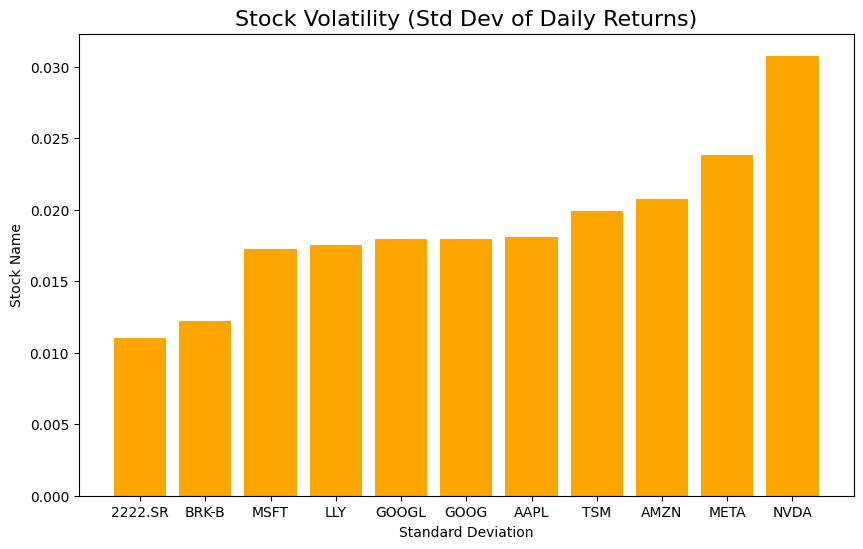

In [ ]:
stdev_sorted = stdev.sort_values(ascending=True)
plt.figure(figsize=(10, 6))
bars = plt.bar(stdev_sorted.index, stdev_sorted.values, color='orange')
plt.title('Stock Volatility (Std Dev of Daily Returns)', fontsize=16)
plt.xlabel('Standard Deviation')
plt.ylabel('Stock Name')

**CALCULATING AND PLOTTING CORRELATION**

In [ ]:

pivot_returns = df.pivot(index='Date', columns='Stock Name', values='Daily Return')
pivot_returns
correlation=pivot_returns.corr()

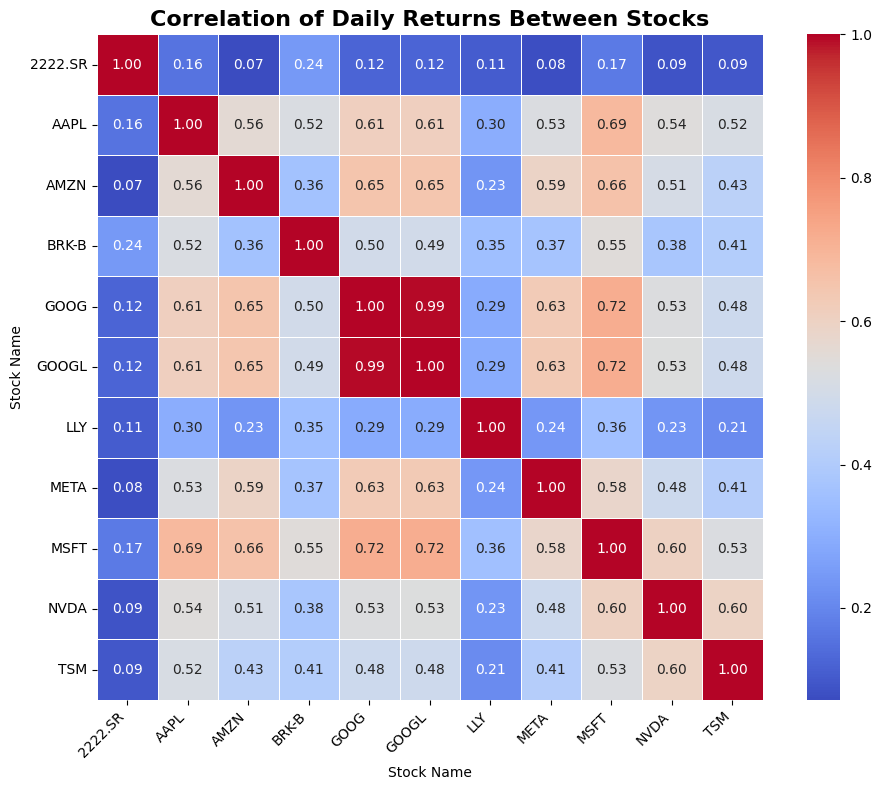

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation,
            annot=True,
            cmap='coolwarm',
            fmt=".2f",
            linewidths=0.5,
            square=True)
plt.title('Correlation of Daily Returns Between Stocks', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
worst_day = df.loc[df['Daily Return'].idxmin()]
print(f"The most significant one-day price drop was for {worst_day['Stock Name']} on {worst_day['Date']}")
print(f"Closing Price: ${worst_day['Adj Close']:.2f}")

The most significant one-day price drop was for META on 2022-02-03 00:00:00
Closing Price: $237.27


**AVERAGE TRADING VOLUME**

In [ ]:
avg_vol = df.groupby('Stock Name')['Volume'].mean().sort_values(ascending=False)
print(avg_vol)

Stock Name
NVDA       4.754354e+08
AAPL       1.195001e+08
AMZN       7.748750e+07
GOOGL      3.545842e+07
GOOG       3.119409e+07
MSFT       2.917985e+07
META       2.325947e+07
2222.SR    1.049886e+07
TSM        9.717626e+06
LLY        4.146936e+06
BRK-B      4.139159e+06
Name: Volume, dtype: float64


In [ ]:
avg_volume_df = df.groupby('Stock Name')['Volume'].mean().reset_index()
avg_volume_df = avg_volume_df.sort_values(by='Volume', ascending=False)

<ipython-input-195-e5fa231d01ff>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_volume_df, x='Stock Name', y='Volume', palette='viridis')


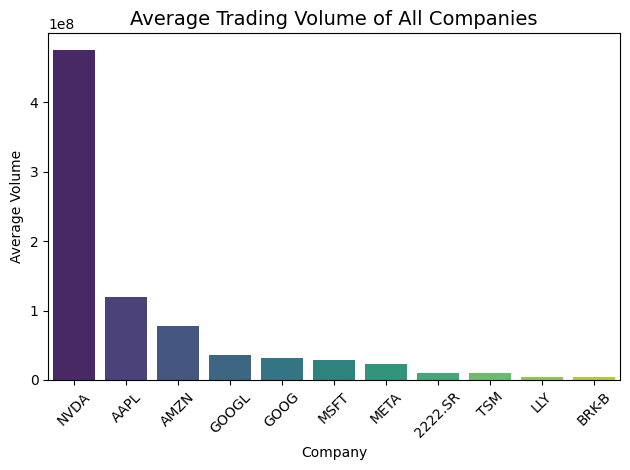

In [ ]:
sns.barplot(data=avg_volume_df, x='Stock Name', y='Volume', palette='viridis')
plt.title('Average Trading Volume of All Companies', fontsize=14)
plt.xlabel('Company')
plt.ylabel('Average Volume')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**TREND COMPARISON OF APPLE AND MICROSOFT OVER THE YEARS**

<ipython-input-205-e07a0d464bd8>:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  plot_data = df.pivot(index='Date', columns='Stock Name', values='Adj Close')[['AAPL', 'MSFT']].resample('Y').mean()


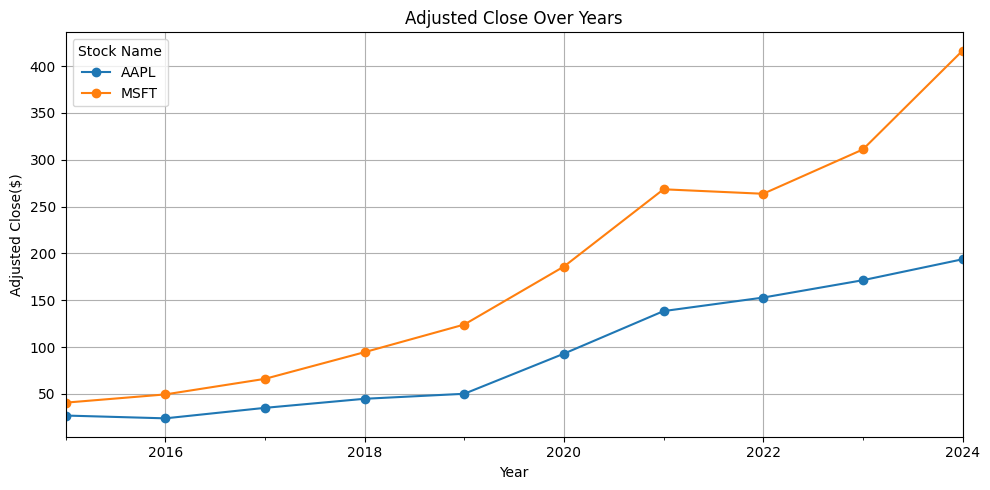

In [ ]:
plot_data = df.pivot(index='Date', columns='Stock Name', values='Adj Close')[['AAPL', 'MSFT']].resample('Y').mean()
plot_data.plot(marker='o', figsize=(10, 5), title='Adjusted Close Over Years')
plt.ylabel('Adjusted Close($)')
plt.xlabel('Year')
plt.grid(True)
plt.tight_layout()
plt.show()